# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

Target variable distribution:
 fraud
0    5
1    5
Name: count, dtype: int64
Percentage:
 fraud
0    0.5
1    0.5
Name: proportion, dtype: float64


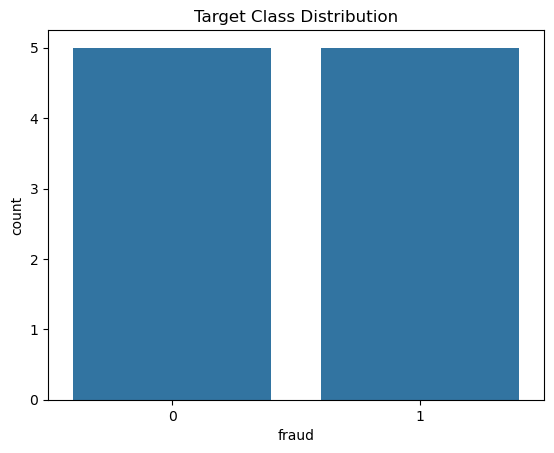

In [6]:
df = pd.DataFrame({
    'distance_from_home': [57.87, 10.82, 5.09, 2.24, 44.19, 1.0, 0.5, 1.5, 0.2, 88.1],
    'distance_from_last_transaction': [0.31, 0.17, 0.80, 5.60, 0.56, 0.1, 0.05, 0.6, 0.3, 2.0],
    'ratio_to_median_purchase_price': [1.94, 1.29, 0.42, 0.36, 2.22, 1.0, 0.7, 1.3, 0.9, 3.0],
    'repeat_retailer': [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    'used_chip': [1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
    'used_pin_number': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    'online_order': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
    'fraud': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
})

# Distribution of the target
target_dist = df['fraud'].value_counts(normalize=True)
print("Target variable distribution:\n", df['fraud'].value_counts())
print("Percentage:\n", target_dist)

# Visualization
sns.countplot(x='fraud', data=df)
plt.title("Target Class Distribution")
plt.show()

In [7]:
# Feature scaling and train-test split
X = df.drop('fraud', axis=1)
y = df['fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42, test_size=0.3)

# Train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]):.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
 [[1 1]
 [1 0]]


NameError: name 'roc_auc_score' is not defined

In [9]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Train/test split on resampled data
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

logreg_os = LogisticRegression()
logreg_os.fit(X_train_os, y_train_os)
y_pred_os = logreg_os.predict(X_test_os)

print("Oversampling:\n", classification_report(y_test_os, y_pred_os))
print("ROC AUC:", roc_auc_score(y_test_os, logreg_os.predict_proba(X_test_os)[:, 1]))

Oversampling:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



NameError: name 'roc_auc_score' is not defined

In [10]:
rus = RandomUnderSampler(random_state=42)
X_resampled_u, y_resampled_u = rus.fit_resample(X_scaled, y)

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_resampled_u, y_resampled_u, test_size=0.3, random_state=42)

logreg_us = LogisticRegression()
logreg_us.fit(X_train_us, y_train_us)
y_pred_us = logreg_us.predict(X_test_us)

print("Undersampling:\n", classification_report(y_test_us, y_pred_us))
print("ROC AUC:", roc_auc_score(y_test_us, logreg_us.predict_proba(X_test_us)[:, 1]))


Undersampling:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



NameError: name 'roc_auc_score' is not defined

In [11]:
smote = SMOTE(random_state=42)
X_resampled_sm, y_resampled_sm = smote.fit_resample(X_scaled, y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled_sm, y_resampled_sm, test_size=0.3, random_state=42)

logreg_sm = LogisticRegression()
logreg_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = logreg_sm.predict(X_test_sm)

print("SMOTE:\n", classification_report(y_test_sm, y_pred_sm))
print("ROC AUC:", roc_auc_score(y_test_sm, logreg_sm.predict_proba(X_test_sm)[:, 1]))


SMOTE:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



NameError: name 'roc_auc_score' is not defined